# But du notebook

Dans ce notebook, plusieurs manières d'instancier un modèle sont expliquées : 

- Instanciation d'un modèle pré-entraîné à partir d'un checkpoint (architecture + poids)
- Instanciation d'un modèle avec la même architecture qu'un checkpoint mais des poids aléatoires

On explique également comment sauvegarder un modèle dans un dossier en local et comment le recharger.

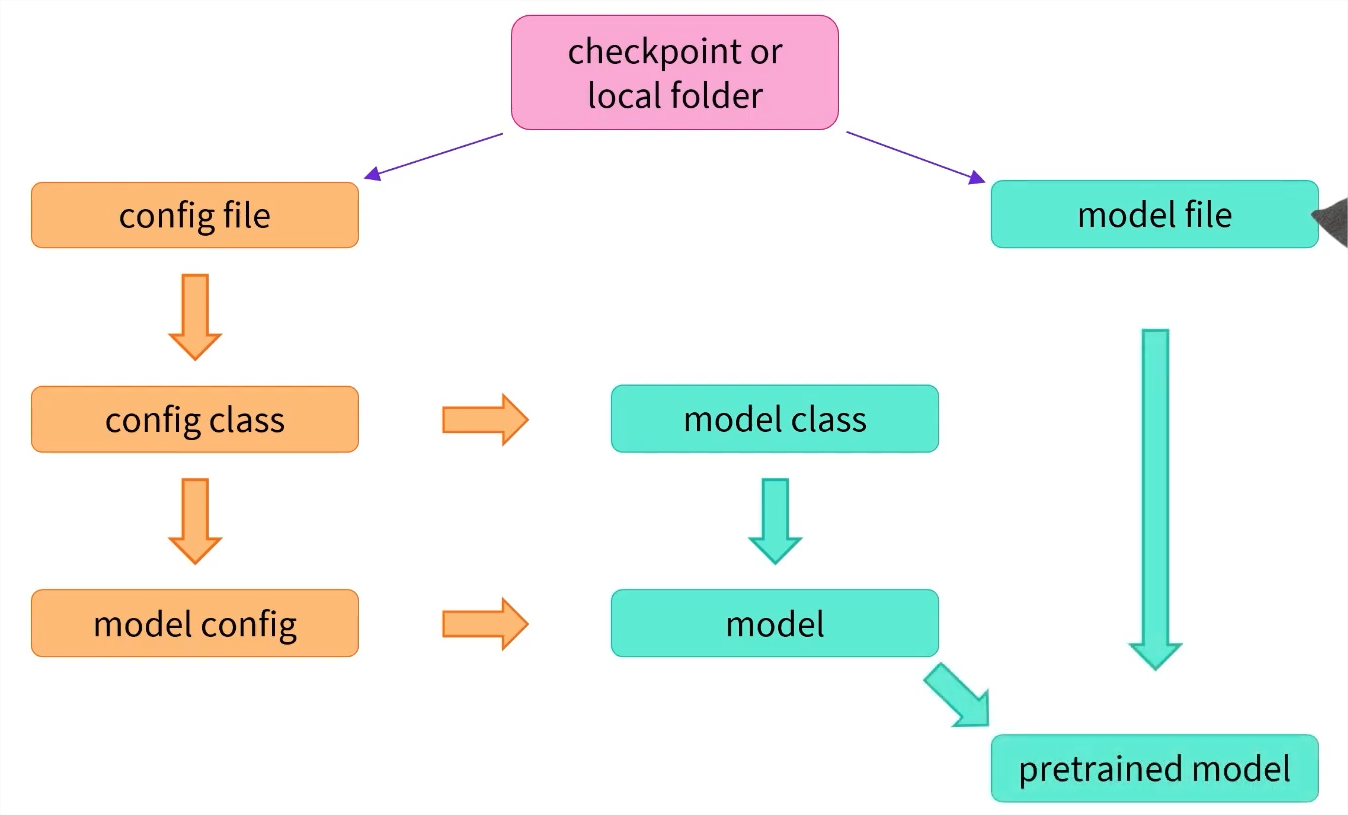

# Importation des modules

In [11]:
from transformers import BertConfig, BertModel, AutoModel, AutoConfig

In [5]:
checkpoint = "bert-base-cased"

# Instantiation avec `AutoModel`

`AutoModel` permet d'instanticier un modèle pré-entraîné à partir d'un checkpoint. On a donc un modèle avec la même architecture et les mêmes poids que le checkpoint.

In [9]:
bert_model = AutoModel.from_pretrained(checkpoint)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


La classe `AutoModel` va automatiquement sélectionner la bonne classe pour le modèle pré-entraîné qu'on charge : ça permet d'utiliser la bonne architecture et de charger les poids dans cette architecture.

Par exemple, si on regarde le type de `bert_model`, on voit que c'est un objet de la classe `BertModel`.

In [10]:
type(bert_model)

transformers.models.bert.modeling_bert.BertModel

# Instanciation avec `AutoConfig`

`AutoConfig` permet de sélectioner la bonne classe de Config pour le checkpoint qu'on veut. Ici, vu que notre checkpoint correspond à `bert-base-cased`, la classe correspondante est `BertConfig`.

In [16]:
bert_config = AutoConfig.from_pretrained(checkpoint)

type(bert_config)

transformers.models.bert.configuration_bert.BertConfig

On peut aussi directement utiliser la classe de `Config` correspondante.

In [14]:
bert_config = BertConfig.from_pretrained(checkpoint)

En créant un modèle à partir du fichier de configuration du checkpoint mais sans le "model file", on crée un modèle avec la même architecture mais il est instancié avec des poids aléatoires.

In [17]:
bert_model = BertModel(bert_config)

On peut également changer n'importe quel paramètre du fichier de configuration de la manière suivante : 

In [18]:
bert_config = BertConfig.from_pretrained(checkpoint, num_hidden_layers = 10)
bert_model = BertModel(bert_config)

# Sauvegarde d'un modèle et chargement d'un modèle sauvegardé

In [21]:
# Sauvegarde dans le dossier "my_bert_model"
bert_model.save_pretrained("my_bert_model")

# Chargement de mon modèle depuis mon dossier
my_bert_model = BertModel.from_pretrained("my_bert_model")